In [1]:
import numpy as np
import mne
import matplotlib.pyplot as plt
import math
from golomb_code import encode, decode
import os
from scipy.interpolate import make_interp_spline

In [14]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'

## filtered data

In [15]:
file = '4b5c_filtered.edf'
data1 = mne.io.read_raw_edf(file)
data1.info

Extracting EDF parameters from /home/ifire/EEG/H-IoT-Golob-Rice-Compression-Automation/EEG data/4b5c_filtered.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


Measurement date,"April 27, 2022 07:50:40 GMT"
Experimenter,Unknown
Participant,X
Digitized points,Not available
Good channels,4 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,125.00 Hz
Highpass,0.50 Hz
Lowpass,30.00 Hz


In [16]:
data1.ch_names

['ch1_LF5-FpZ', 'ch2_OTE_L-FpZ', 'ch4_RF6-FpZ', 'ch5_OTE_R-FpZ']

In [17]:
EEG_raw_data  = data1.get_data()
SCALE=1e5 ## sclaed by 100000
raw_data= EEG_raw_data*SCALE

Text(0, 0.5, 'Frequency')

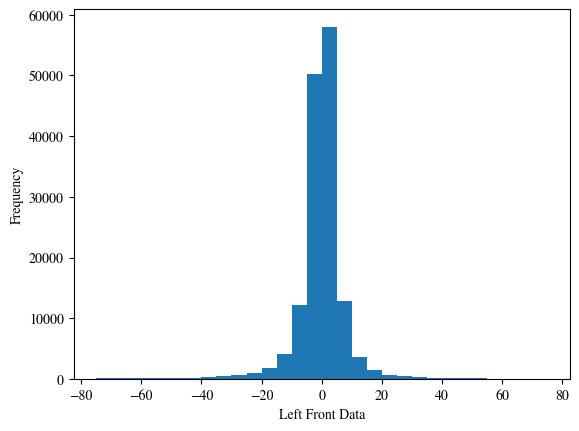

In [22]:
plt.hist(raw_data[0], bins = 30, range = [-75, 75])
plt.xlabel('Left Front Data')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

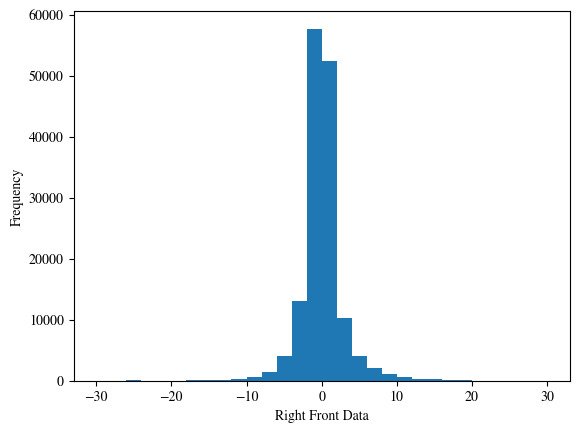

In [23]:
plt.hist(raw_data[2], bins = 30, range = [-30, 30])
plt.xlabel('Right Front Data')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

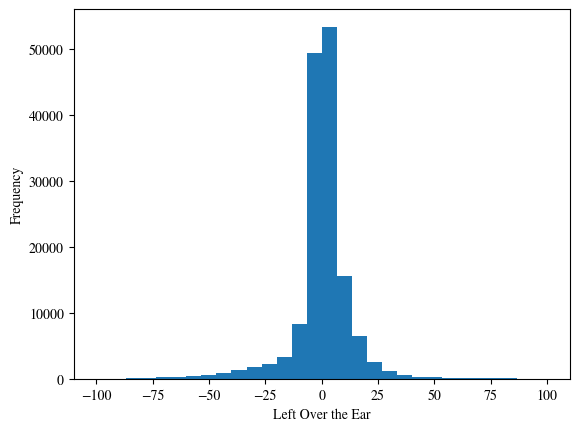

In [39]:
plt.hist(raw_data[1], bins = 30, range = [-100, 100])
plt.xlabel('Left Over the Ear')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

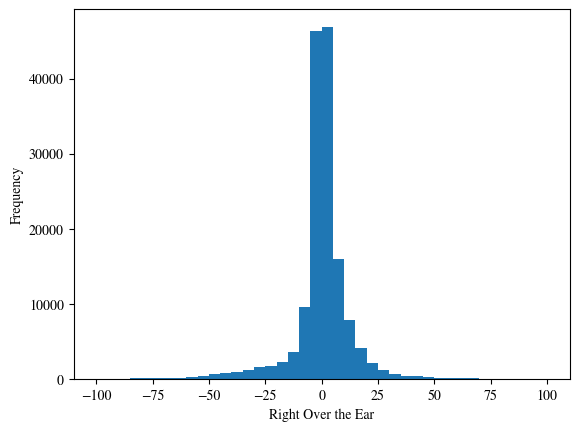

In [48]:
plt.hist(raw_data[3], bins = 40, range = [-100, 100]
         
         )
plt.xlabel('Right Over the Ear')
plt.ylabel('Frequency')

## unfiltered data histogram